In [ ]:
import sys
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection

In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.fixes import parse_version
if parse_version(matplotlib.__version__) >= parse_version("2.1"):
    density_param= {"density": True}
else:
    density_param= {"normed": True}

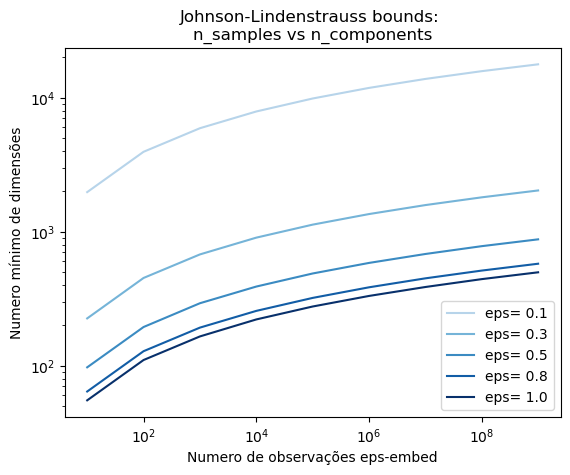

In [ ]:
eps_range= np.linspace(0.1, 0.99, 5)
colors= plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))
n_samples_range= np.logspace(1, 9, 9)
plt.figure()

for eps, color in zip(eps_range, colors):
    min_n_components= johnson_lindenstrauss_min_dim(n_samples_range, eps= eps)
    plt.loglog(n_samples_range, min_n_components, color= color)

plt.legend(["eps= %0.1f" % eps for eps in eps_range], loc= "lower right")
plt.xlabel("Numero de observações eps-embed")
plt.ylabel("Numero mínimo de dimensões")
plt.title("Johnson-Lindenstrauss bounds: \nn_samples vs n_components")
plt.show()

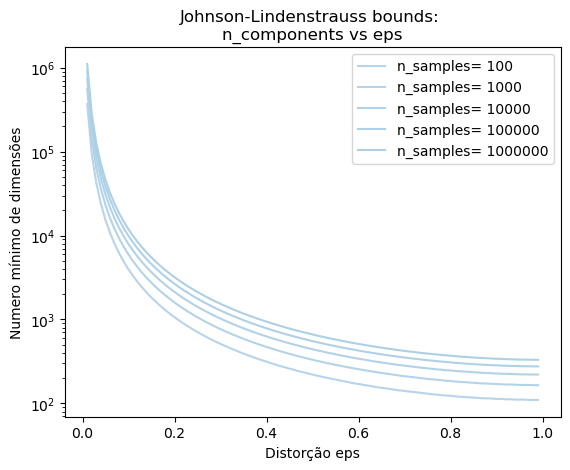

In [ ]:
eps_range= np.linspace(0.01, 0.99, 100)
n_samples_range= np.logspace(2, 6, 5)

colors= plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

plt.figure()

for n_samples, color in zip(n_samples_range, colors):
    min_n_components= johnson_lindenstrauss_min_dim(n_samples, eps= eps_range)
    plt.semilogy(eps_range, min_n_components, color= color)

plt.legend(["n_samples= %d" % n for n in n_samples_range], loc= "upper right")
plt.xlabel("Distorção eps")
plt.ylabel("Numero mínimo de dimensões")
plt.title("Johnson-Lindenstrauss bounds: \nn_components vs eps")
plt.show()